# Custom Q Learning Algorithm

## 1. Setup

In [1]:
import gymnasium as gym
from gymnasium import Env
from gymnasium.spaces import Discrete, Box, Dict, Tuple, MultiBinary, MultiDiscrete

import os
import numpy as np
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
# making use of the custom shower environment as this is a relatively simple environment
class ShowerEnv(Env):
    def __init__(self,simple=True):
        self.action_space = Discrete(3)
        self.observation_space = Box(low=0,high=100,shape=(1,))
        self.state = 38 + random.randint(-3,3)
        self.shower_length = 60
        self.info = {}
        self.simple = simple
        
    def step(self,action):
        # Apply action (change in temperature)
        self.state += action -1

        # Decrease episode lenght remaining (shower time)
        self.shower_length -= 1

        # Define reward function (immediate reward)
        if self.state >= 37 and self.state <= 39:
            if self.simple:
                reward = 1
            else:
                reward = 10
        else:
            if self.simple:
                reward = -1
            else:
                reward = -1 * 0.1*(60-self.shower_length)

        if self.shower_length <=0:
            truncated = True
            terminated = True
        else:
            truncated = False
            terminated = False

        return self.state,reward,terminated,truncated,self.info
        
    def render(self):
        pass
        
    def reset(self):
        self.state = np.array([38 + random.randint(-3, 3)]).astype(float)
        self.shower_length = 60
        return self.state

In [3]:
env = ShowerEnv(simple=True)
print(env.observation_space)
env.action_space

Box(0.0, 100.0, (1,), float32)


2

## 2. Custom Algorithm

In [4]:
class Q_learning_agent():
    def __init__(self,action_size,state_size,env):
        self.q_table = np.zeros([state_size, action_size])
        self.env = env
        
    def train(self,n_steps,learning_rate=0.1,discount_factor=0.6,exploration_factor=0.1):
        # Hyperparameters
        alpha = learning_rate
        gamma = discount_factor
        epsilon = exploration_factor
        
        # For plotting metrics
        all_epochs = []
        all_penalties = []
        
        for i in tqdm(range(1, n_steps+1)):
            state = self.env.reset()[0]
            state = int(state)
        
            epochs, penalties, reward, = 0, 0, 0
            terminated = False
            
            while not terminated:
                if random.uniform(0, 1) < epsilon:
                    action = self.env.action_space.sample() # Explore action space
                else:
                    action = np.argmax(self.q_table[state]) # Exploit learned values
        
                next_state, reward, terminated,truncated, info = self.env.step(action) 
                next_state = int(next_state[0])
                
                old_value = self.q_table[state, action]
                next_max = np.max(self.q_table[next_state])
                
                new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
                self.q_table[state, action] = new_value
        
                if reward == -10:
                    penalties += 1
        
                state = next_state
                epochs += 1
            
        print("Training finished.\n")

    def evaluate(self):
        """Evaluate agent's performance after Q-learning"""

        total_epochs, total_penalties = 0, 0
        episodes = 100
        avg_reward = np.array([0])
        
        for _ in range(episodes):
            state = self.env.reset()[0]
            state = int(state)
            epochs, tot_reward = 0, 0
            
            terminated = False
            
            while not terminated:
                action = np.argmax(self.q_table[state])
                state, reward, terminated,truncated, info = self.env.step(action)
                state = int(state[0])

                tot_reward += reward
                epochs += 1
            avg_reward = np.append(avg_reward,tot_reward)
            
        return avg_reward
   

In [5]:
Agent = Q_learning_agent(3,100,env)

## 3. Train Agent

In [6]:
n_steps = 100
avg_before = Agent.evaluate()

Agent.train(n_steps=n_steps)
      
avg_after = Agent.evaluate()

100%|███████████████████████████████████████| 100/100 [00:00<00:00, 1121.98it/s]

Training finished.



## 4. Evaluate Agent

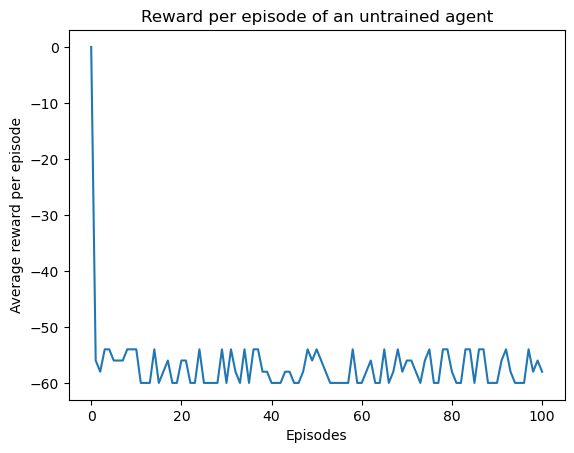

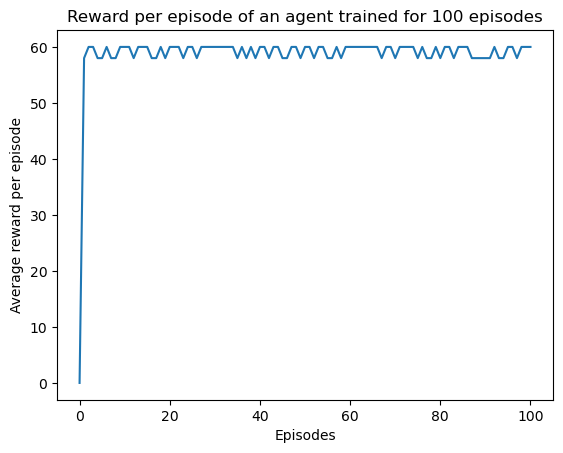

In [7]:
plt.plot(avg_before)
plt.title("Reward per episode of an untrained agent")
plt.xlabel("Episodes")
plt.ylabel("Average reward per episode")
plt.show()

plt.plot(avg_after)
plt.title('Reward per episode of an agent trained for {} episodes'.format(n_steps))
plt.xlabel("Episodes")
plt.ylabel("Average reward per episode")
plt.show()